In [2]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plot
%matplotlib inline

### Loading Data

In [3]:
X = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_train.txt", delimiter = None)
Y = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\Y_train.txt", delimiter = None)

Xte = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_test.txt", delimiter = None)

In [4]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y) # Default is 80% train & 20% val
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

## Cross Validation: Training/Validation Error

In [15]:
nFolds = 10
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

trainval = np.zeros(len(depth))
crossval = np.zeros(len(depth))

for i in range(len(depth)):
    Jt = np.zeros(nFolds)
    Jv = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(X, Y, nFolds, iFold)
        
        learner = ml.dtree.treeClassify(Xti, Yti, maxDepth = depth[i])
        
        Jt[iFold] = learner.err(Xti, Yti)
        Jv[iFold] = learner.err(Xvi,Yvi)
    
    trainval[i] = np.mean(Jt)
    crossval[i] = np.mean(Jv)

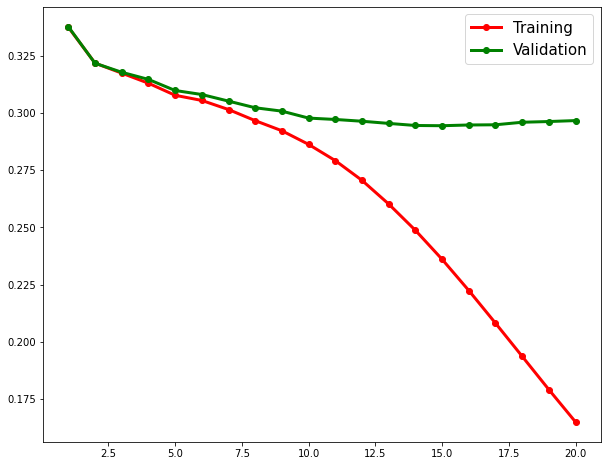

In [16]:
f, ax = plt.subplots(1,1, figsize = (10,8))

plt.plot(depth, trainval, lw = 3, color = 'red', label = 'Training', marker = 'o')
plt.plot(depth, crossval, lw = 3, color = 'green', label = 'Validation', marker = 'o')
ax.legend(fontsize = 15)
plt.show()

## Cross Validation: Train/Val AUC

In [24]:
nFolds = 10
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

trainval_auc = np.zeros(len(depth))
crossval_auc = np.zeros(len(depth))

for i in range(len(depth)):
    Jt_auc = np.zeros(nFolds)
    Jv_auc = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(X, Y, nFolds, iFold)
        
        learner = ml.dtree.treeClassify(Xti, Yti, maxDepth = depth[i])
        
        Jt_auc[iFold] = learner.auc(Xti, Yti)
        Jv_auc[iFold] = learner.auc(Xvi,Yvi)
    
    trainval_auc[i] = np.mean(Jt_auc)
    crossval_auc[i] = np.mean(Jv_auc)

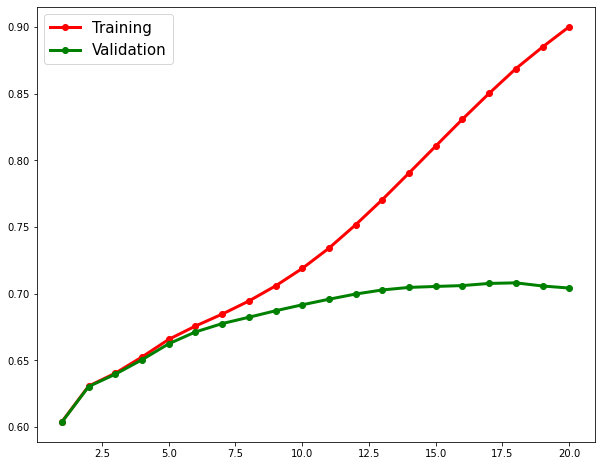

In [25]:
f, ax = plt.subplots(1,1, figsize = (10,8))

plt.plot(depth, trainval_auc, lw = 3, color = 'red', label = 'Training', marker = 'o')
plt.plot(depth, crossval_auc, lw = 3, color = 'green', label = 'Validation', marker = 'o')
ax.legend(fontsize = 15)
plt.show()

In [5]:
nFolds = 10
parent = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

trainval = np.zeros(len(parent))
crossval = np.zeros(len(parent))

for i in range(len(parent)):
    Jt = np.zeros(nFolds)
    Jv = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(X, Y, nFolds, iFold)
        
        learner = ml.dtree.treeClassify(Xti, Yti, minParent = parent[i])
        
        Jt[iFold] = learner.err(Xti, Yti)
        Jv[iFold] = learner.err(Xvi,Yvi)
    
    trainval[i] = np.mean(Jt)
    crossval[i] = np.mean(Jv)

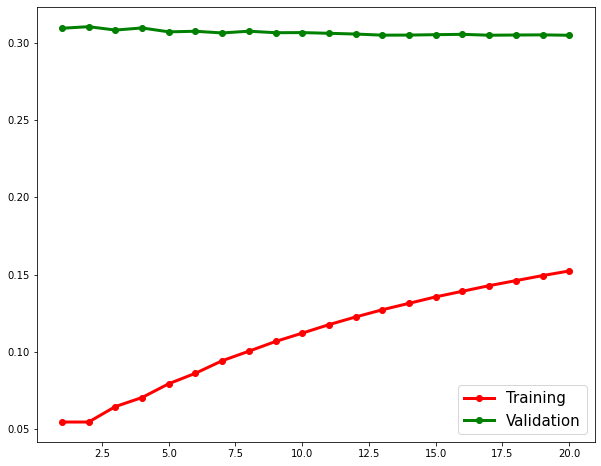

In [7]:
f, ax = plt.subplots(1,1, figsize = (10,8))

plt.plot(parent, trainval, lw = 3, color = 'red', label = 'Training', marker = 'o')
plt.plot(parent, crossval, lw = 3, color = 'green', label = 'Validation', marker = 'o')
ax.legend(fontsize = 15)
plt.show()

In [ ]:
nFolds = 10
parent = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

trainval_auc = np.zeros(len(parent))
crossval_auc = np.zeros(len(parent))

for i in range(len(parent)):
    Jt_auc = np.zeros(nFolds)
    Jv_auc = np.zeros(nFolds)
    
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(X, Y, nFolds, iFold)
        
        learner = ml.dtree.treeClassify(Xti, Yti, minParent = parent[i])
        
        Jt_auc[iFold] = learner.auc(Xti, Yti)
        Jv_auc[iFold] = learner.auc(Xvi,Yvi)
    
    trainval_auc[i] = np.mean(Jt_auc)
    crossval_auc[i] = np.mean(Jv_auc)

In [ ]:
f, ax = plt.subplots(1,1, figsize = (10,8))

plt.plot(depth, trainval_auc, lw = 3, color = 'red', label = 'Training', marker = 'o')
plt.plot(depth, crossval_auc, lw = 3, color = 'green', label = 'Validation', marker = 'o')
ax.legend(fontsize = 15)
plt.show()

## No CrossValidation; 80/20

In [6]:
depth = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
errTrain = np.zeros(len(depth))
errVal = np.zeros(len(depth))

aucTrain = np.zeros(len(depth))
aucVal = np.zeros(len(depth))

for i in range(len(depth)):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = depth[i])
    errTrain[i] = learner.err(Xtr, Ytr)
    errVal[i] = learner.err(Xva, Yva)
    
    aucTrain[i] = learner.auc(Xtr, Ytr)
    aucVal[i] = learner.auc(Xva, Yva)

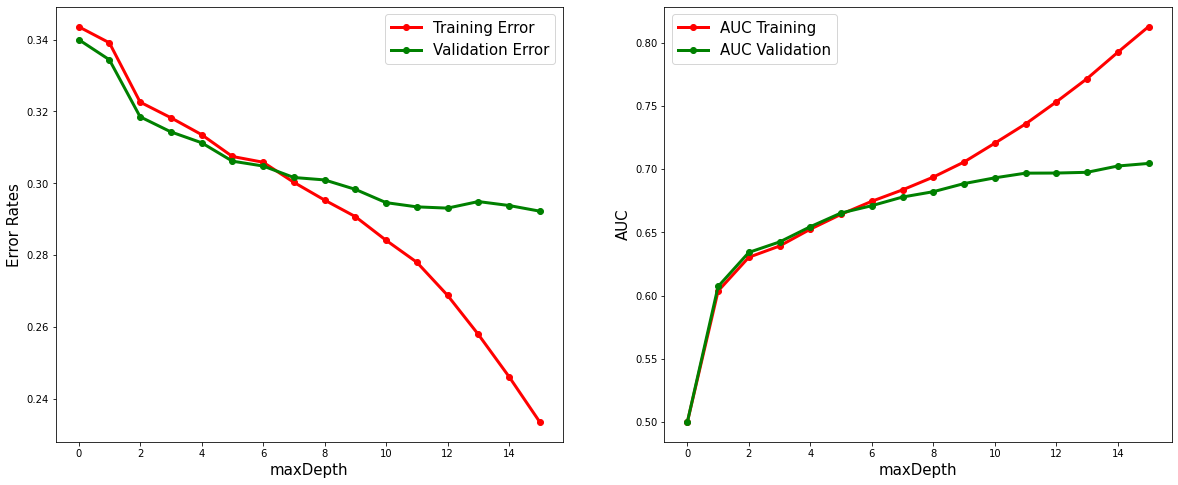

In [7]:
f, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].plot(depth, errTrain, color = 'red', lw = 3, marker = 'o', label = 'Training Error')
ax[0].plot(depth, errVal, color = 'green', lw = 3, marker = 'o', label = 'Validation Error')
ax[0].set_xlabel('maxDepth', fontsize = 15)
ax[0].set_ylabel('Error Rates', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(depth, aucTrain, color = 'red', lw = 3, marker = 'o', label = 'AUC Training')
ax[1].plot(depth, aucVal, color = 'green', lw = 3, marker = 'o', label = 'AUC Validation')
ax[1].set_xlabel('maxDepth', fontsize = 15)
ax[1].set_ylabel('AUC', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

In [20]:
depth = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
errTrain = np.zeros(len(depth))
errVal = np.zeros(len(depth))

aucTrain = np.zeros(len(depth))
aucVal = np.zeros(len(depth))

for i in range(len(depth)):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = depth[i])
    errTrain[i] = learner.err(Xtr, Ytr)
    errVal[i] = learner.err(Xva, Yva)
    
    aucTrain[i] = learner.auc(Xtr, Ytr)
    aucVal[i] = learner.auc(Xva, Yva)

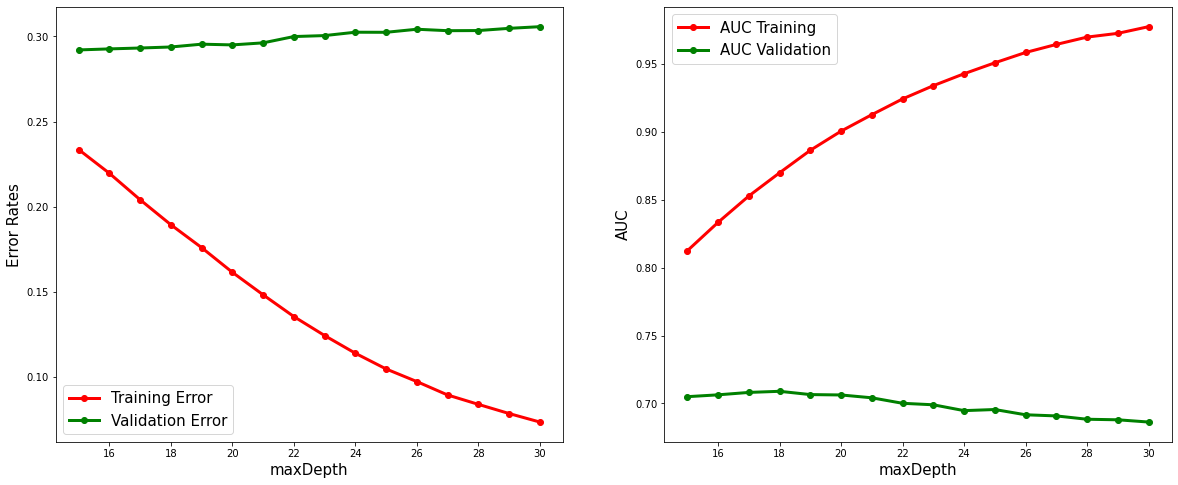

In [21]:
f, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].plot(depth, errTrain, color = 'red', lw = 3, marker = 'o', label = 'Training Error')
ax[0].plot(depth, errVal, color = 'green', lw = 3, marker = 'o', label = 'Validation Error')
ax[0].set_xlabel('maxDepth', fontsize = 15)
ax[0].set_ylabel('Error Rates', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(depth, aucTrain, color = 'red', lw = 3, marker = 'o', label = 'AUC Training')
ax[1].plot(depth, aucVal, color = 'green', lw = 3, marker = 'o', label = 'AUC Validation')
ax[1].set_xlabel('maxDepth', fontsize = 15)
ax[1].set_ylabel('AUC', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

In [18]:
parent = [0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13]
parent = [2**i for i in parent]
#parent = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

errTrain = np.zeros(len(parent))
errVal = np.zeros(len(parent))

aucTrain = np.zeros(len(parent))
aucVal = np.zeros(len(parent))

for i in range(len(parent)):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 15, minParent = parent[i])
    errTrain[i] = learner.err(Xtr, Ytr)
    errVal[i] = learner.err(Xva, Yva)
    
    aucTrain[i] = learner.auc(Xtr, Ytr)
    aucVal[i] = learner.auc(Xva, Yva)

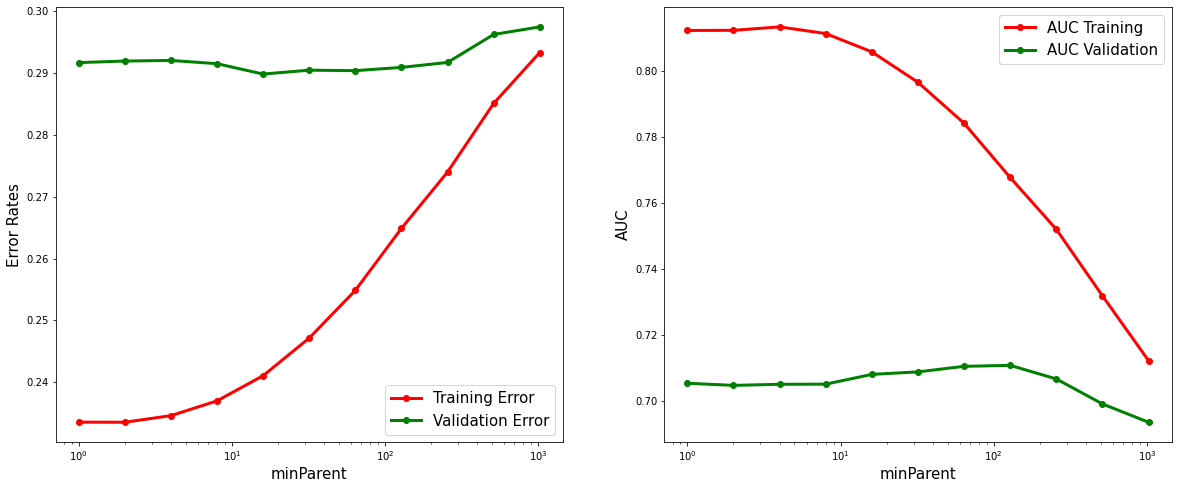

In [19]:
f, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].semilogx(parent, errTrain, color = 'red', lw = 3, marker = 'o', label = 'Training Error')
ax[0].semilogx(parent, errVal, color = 'green', lw = 3, marker = 'o', label = 'Validation Error')
ax[0].set_xlabel('minParent', fontsize = 15)
ax[0].set_ylabel('Error Rates', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].semilogx(parent, aucTrain, color = 'red', lw = 3, marker = 'o', label = 'AUC Training')
ax[1].semilogx(parent, aucVal, color = 'green', lw = 3, marker = 'o', label = 'AUC Validation')
ax[1].set_xlabel('minParent', fontsize = 15)
ax[1].set_ylabel('AUC', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

Best minParent = 2**7